### This notebook contains:
1. Data loading and exploration - for both detection and classification.
2. Preperation for training - annotations and splitting according to the desired task

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import itertools
import soundfile as sf

import glob
import os

# Loading

In [2]:
annot_files = glob.glob('/home/shai/personal/soundbay/data/annotated_calls/annotations/*.txt')
df_list = []

for file in annot_files:
        tmp_df = pd.read_csv(file, sep='\t')
        # print(f'tail for {file.split("/")[-1]}: \n {tmp_df.tail(2)} \n\n)')
        
print(f'\n list of keys: {[item for item in tmp_df.keys().values]}')


 list of keys: ['Selection', 'View', 'Channel', 'Begin Time (s)', 'End Time (s)', 'Low Freq (Hz)', 'High Freq (Hz)', 'Max Freq (Hz)', 'Peak Freq (Hz)', 'Type', 'Caract']


In [3]:
df_list_cls = []
df_list_wocls = []

for file in annot_files:
    
    data_and_time, _, _, _, _ = file.split('/')[-1].split('.')

    tmp_df = pd.read_csv(file, sep='\t')
    
    # add
    tmp_df['file_name'] = data_and_time
    tmp_df['start_time'] = pd.to_datetime(''.join(data_and_time), format='%y%m%d-%H%M%S')
    
    # drop
    tmp_df = tmp_df.drop(columns=['Selection', 'View'])
    
    # rename
    tmp_df = tmp_df.rename(columns={'Type': 'type'})
    tmp_df = tmp_df.rename(columns={'Carac': 'Caract'})
    
    if 'Caract' not in tmp_df.columns:
        # print(f'file {file} doesnt have any Caract')
        df_list_wocls.append(tmp_df)
        continue
    df_list_cls.append(tmp_df)

In [4]:
## DF without classes - only for detection
annot_df_wocls = pd.concat(df_list_wocls, axis=0)
print(f'len of annot_df_wocls: {len(annot_df_wocls)}')
annot_df_wocls.head(4)

len of annot_df_wocls: 916


,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Delta Time (s),Delta Freq (Hz),Avg Power Density (dB FS/Hz),Max Freq (Hz),file_name,start_time,Peak Freq (Hz),type
0,2,3.815649,4.790005,283.019,584.906,0.9744,301.887,NaN,515.625,210922-112437,2021-09-22 11:24:37,NaN,NaN
1,2,3.815649,4.790005,283.019,584.906,0.9744,301.887,-47.73,515.625,210922-112437,2021-09-22 11:24:37,NaN,NaN
2,2,776.537728,777.332597,188.679,471.698,0.7949,283.019,NaN,375.000,210922-112437,2021-09-22 11:24:37,NaN,NaN
3,2,776.537728,777.332597,188.679,471.698,0.7949,283.019,-56.84,375.000,210922-112437,2021-09-22 11:24:37,NaN,NaN


In [5]:
## DF for classification
annot_df = pd.concat(df_list_cls, axis=0)

# Caract
annot_df['Caract'].fillna('UnClas', inplace=True) # UnClassified
annot_df_cls_full = annot_df
annot_df = annot_df.loc[annot_df['Caract']!="UnClas"]

print(f'len of annot_df_cls:{len(annot_df)}, len of annot_df_cls WITH unclassified calls: {len(annot_df_cls_full)}\n ')

annot_df.head(10)

len of annot_df_cls:206, len of annot_df_cls WITH unclassified calls: 244
 


,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Max Freq (Hz),Peak Freq (Hz),Peak Time (s),Delta Time (s),type,Caract,file_name,start_time
0,2,1.898836,2.866978,181.8,469.7,328.125,328.125,2.1587,0.9681,A,Onda,210919-131709,2021-09-19 13:17:09
1,2,6.551240,7.466920,151.5,424.3,257.812,257.812,6.6550,0.9157,A,Onda,210919-131709,2021-09-19 13:17:09
2,2,7.787410,7.998181,106.7,253.5,210.938,210.938,7.8375,0.2108,B,Silbo,210919-131709,2021-09-19 13:17:09
3,2,12.668408,13.278533,186.8,386.9,281.250,281.250,13.0350,0.6101,C,Lineal,210919-131709,2021-09-19 13:17:09
38,2,189.805685,190.495962,155.8,407.9,328.125,328.125,190.1350,0.6903,A,Onda,210919-131709,2021-09-19 13:17:09
39,2,206.007720,206.579664,170.6,452.4,351.562,351.562,206.1675,0.5719,A,Onda,210919-131709,2021-09-19 13:17:09
40,2,208.776811,209.519680,155.8,452.4,351.562,351.562,209.3437,0.7429,A,Onda,210919-131709,2021-09-19 13:17:09
41,2,207.288042,207.432671,66.8,192.8,140.625,140.625,207.3362,0.1446,D,Click,210919-131709,2021-09-19 13:17:09
42,2,208.333319,208.438504,296.7,415.4,375.000,375.000,208.3675,0.1052,D,Click,210919-131709,2021-09-19 13:17:09
43,2,210.268680,210.393588,59.3,200.3,140.625,140.625,210.3200,0.1249,D,Click,210919-131709,2021-09-19 13:17:09


# Exploration - classification

In [6]:
# type
print(f'list of types: \n{[item for item in dict(annot_df["type"].value_counts()).items()]} \n')

list of types: 
[('A', 84), ('D', 49), ('E', 23), ('G', 12), ('H', 11), ('I', 11), ('C', 6), ('F', 4), ('J', 4), ('B', 1), ('K', 1)] 



list of classes: 
Onda      100
Click      49
UnClas     38
Down       23
Up         23
Lineal     10
Silbo       1
Name: Caract, dtype: int64 



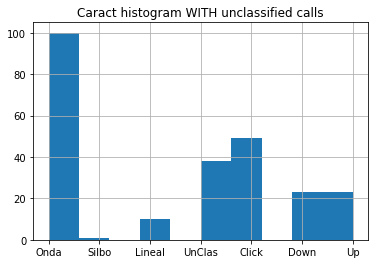

In [7]:
# Caract 
print(f'list of classes: \n{annot_df_cls_full["Caract"].value_counts()} \n')

annot_df_cls_full['Caract'].hist()
plt.title('Caract histogram WITH unclassified calls')
plt.show()

### Frequency

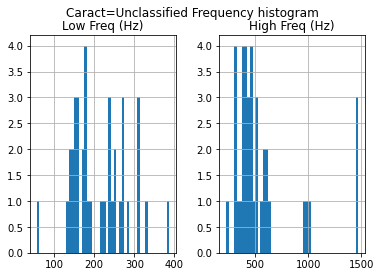

Low Freq min: 14.8 max:430.07


In [8]:
annot_df_cls_full[['Low Freq (Hz)', 'Caract', 'High Freq (Hz)']].loc[annot_df_cls_full['Caract'] == "UnClas"].hist(bins=50)
plt.suptitle('Caract=Unclassified Frequency histogram')
plt.show()
print(f"Low Freq min: {annot_df_cls_full['Low Freq (Hz)'].min()} max:{annot_df_cls_full['Low Freq (Hz)'].max()}")

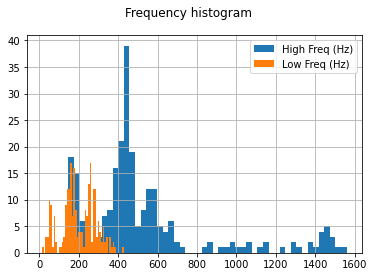

Low Freq min: 14.8 max:430.07


In [9]:
annot_df_cls_full["High Freq (Hz)"].hist(bins=50, legend=True)
annot_df_cls_full["Low Freq (Hz)"].hist(bins=50, legend=True)
plt.suptitle('Frequency histogram')
plt.show()
print(f"Low Freq min: {annot_df_cls_full['Low Freq (Hz)'].min()} max:{annot_df_cls_full['Low Freq (Hz)'].max()}")

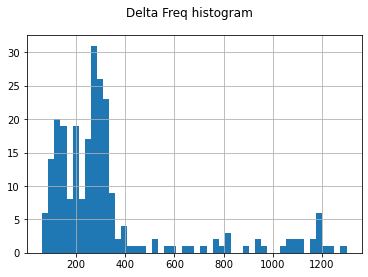

In [10]:
(annot_df_cls_full["High Freq (Hz)"] - annot_df_cls_full["Low Freq (Hz)"]).hist(bins=50)
plt.suptitle('Delta Freq histogram')
plt.show()

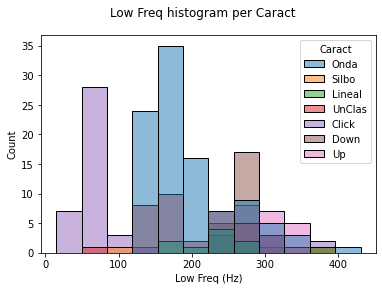

median Low-Freq per Caract: 

        Low Freq (Hz)
Caract               
Click          62.937
Down          272.727
Lineal        230.769
Onda          178.013
Silbo         106.700
UnClas        187.750
Up            304.196


In [11]:
sns.histplot(annot_df_cls_full[['Low Freq (Hz)', 'Caract', 'High Freq (Hz)']].reset_index(drop=True), x='Low Freq (Hz)', hue='Caract')
plt.suptitle('Low Freq histogram per Caract')
plt.show()

print(f"median Low-Freq per Caract: \n\n{annot_df_cls_full[['Caract', 'Low Freq (Hz)']].groupby(['Caract']).median()}")

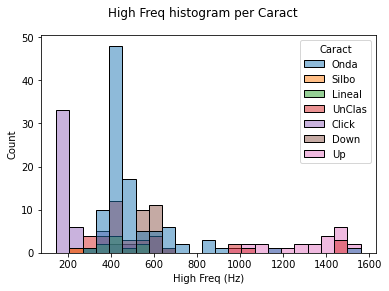

median High-Freq per Caract: 

        High Freq (Hz)
Caract                
Click          188.811
Down           576.923
Lineal         440.559
Onda           451.049
Silbo          253.500
UnClas         452.600
Up            1384.615


In [12]:
sns.histplot(annot_df_cls_full[['Low Freq (Hz)', 'Caract', 'High Freq (Hz)']].reset_index(drop=True), x='High Freq (Hz)', hue='Caract')
plt.suptitle('High Freq histogram per Caract')
plt.show()
print(f"median High-Freq per Caract: \n\n{annot_df_cls_full[['Caract', 'High Freq (Hz)']].groupby(['Caract']).median()}")

### Explore calls length 

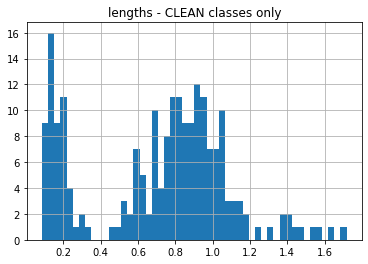

avarage length of CLEAN classed-sample: 0.7101506315922311 seconds, median: 0.7883280989999832 seconds



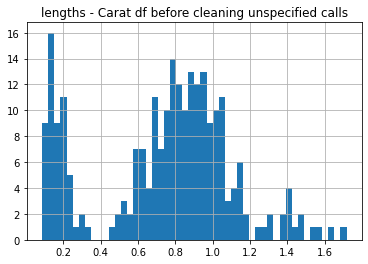

avarage length of classed-sample: 0.7417877000081958 seconds, median: 0.8040162204999888 seconds


In [13]:
length_calls_clean_cls = annot_df["End Time (s)"] - annot_df["Begin Time (s)"]
length_calls_clean_cls.hist(bins=50)
plt.title('lengths - CLEAN classes only')
plt.show()
print(f'avarage length of CLEAN classed-sample: {length_calls_clean_cls.mean()} seconds, median: {length_calls_clean_cls.median()} seconds\n')

Sanity_TH = 5 #ms
length_calls_full_cls = annot_df_cls_full["End Time (s)"] - annot_df_cls_full["Begin Time (s)"]
length_calls_full_cls = length_calls_full_cls.loc[length_calls_full_cls<Sanity_TH]
length_calls_full_cls.hist(bins=50)
plt.title('lengths - Carat df before cleaning unspecified calls')
plt.show()
print(f'avarage length of classed-sample: {length_calls_full_cls.mean()} seconds, median: {length_calls_full_cls.median()} seconds')

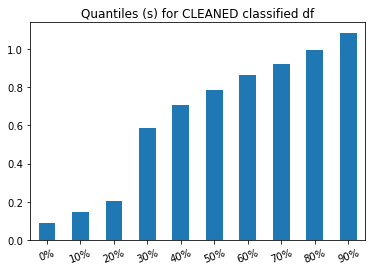

In [14]:
quantile_keys = np.arange(0, 1, 0.1)
pd.Series(np.quantile(length_calls_clean_cls, quantile_keys), index=map(lambda x: f'{x:.0%}', quantile_keys), name='Quantiles').plot.bar()
plt.title('Quantiles (s) for CLEANED classified df')
plt.xticks(rotation=20)
plt.show()

# Exploration - detection

### Frequency

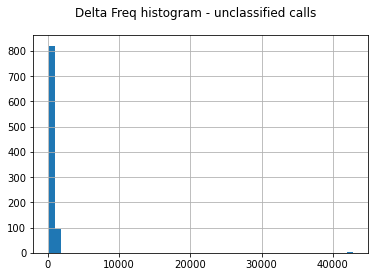

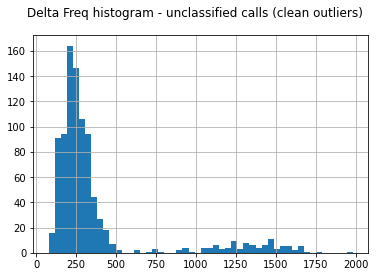

In [15]:
diffs_freqs_wocls = (annot_df_wocls["High Freq (Hz)"] - annot_df_wocls["Low Freq (Hz)"])
diffs_freqs_wocls.hist(bins=50)
plt.suptitle('Delta Freq histogram - unclassified calls')
plt.show()

Sanity_Freq = 10000
clean_diffs_freqs_wocls = diffs_freqs_wocls.loc[diffs_freqs_wocls<Sanity_Freq]
clean_diffs_freqs_wocls.hist(bins=50)
plt.suptitle('Delta Freq histogram - unclassified calls (clean outliers)')
plt.show()

### Calls lengths

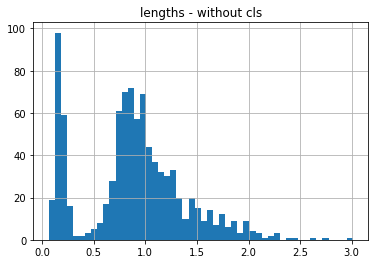

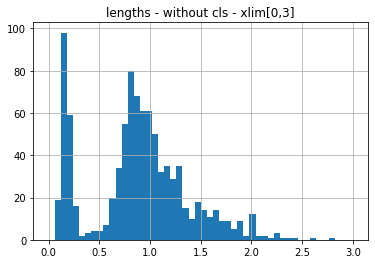

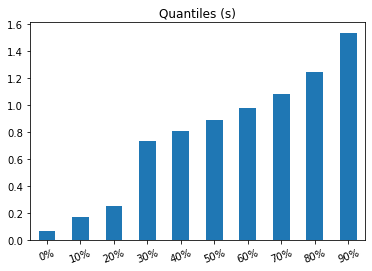

In [16]:
(annot_df_wocls["End Time (s)"] - annot_df_wocls["Begin Time (s)"])[:-2].hist(bins=50)
plt.title('lengths - without cls')
plt.show()

(annot_df_wocls["End Time (s)"] - annot_df_wocls["Begin Time (s)"]).hist(bins=50, range=(0, 3))
plt.title('lengths - without cls - xlim[0,3]')
plt.show()

quantile_keys = np.arange(0, 1, 0.1)
pd.Series(np.quantile(annot_df_wocls["End Time (s)"] - annot_df_wocls["Begin Time (s)"], quantile_keys), index=map(lambda x: f'{x:.0%}', quantile_keys), name='Quantiles').plot.bar()
plt.title('Quantiles (s)')
plt.xticks(rotation=20)
plt.show()

In [17]:
annot_df_wocls_combined = pd.merge(annot_df_wocls, annot_df_cls_full, how='outer')
print(f"len annot_df_wocls_combined: {len(annot_df_wocls_combined)}, Vs original annot_df_wocls: {len(annot_df_wocls)}")
annot_df_wocls_combined.drop(columns=['Caract'], inplace=True)
annot_df_wocls_combined.head(1)

len annot_df_wocls_combined: 1160, Vs original annot_df_wocls: 916


,Channel,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Delta Time (s),Delta Freq (Hz),Avg Power Density (dB FS/Hz),Max Freq (Hz),file_name,start_time,Peak Freq (Hz),type,Peak Time (s)
0,2,3.815649,4.790005,283.019,584.906,0.9744,301.887,NaN,515.625,210922-112437,2021-09-22 11:24:37,NaN,NaN,NaN


# Create model annotations

begin_time, end_time, channel, filename, call_length, label

In [18]:
def range_diff(r1, r2):
    s1, e1 = r1
    s2, e2 = r2
    endpoints = sorted((s1, s2, e1, e2))
    result = []
    if endpoints[0] == s1 and endpoints[1] != s1:
        result.append((endpoints[0], endpoints[1]))
    if endpoints[3] == e1 and endpoints[2] != e1:
        result.append((endpoints[2], endpoints[3]))
    return result

def multirange_diff(r1_list, r2_list):
    """Generated the difference between two time ranges"""
    for r2 in r2_list:
        r1_list = list(itertools.chain(*[range_diff(r1, r2) for r1 in r1_list]))
    return r1_list

In [19]:
wav_folder = '/home/shai/personal/soundbay/data/annotated_calls/'

In [20]:
audio_files_only_wo_cls = annot_df_wocls.file_name.unique()  # annot_df.file_name.unique()
print(f'audio_files_only_wo_cls:{audio_files_only_wo_cls}')
audio_files_only_cls = annot_df.file_name.unique() 
print(f'audio_files_only_cls:{audio_files_only_cls}')
audio_files_all_calls_combined = annot_df_wocls_combined.file_name.unique()
print(f'audio_files_all_calls_combined:{audio_files_all_calls_combined}')

audio_files_only_wo_cls:['210922-112437' '210926-104317' '210925-104759' '210919-140341']
audio_files_only_cls:['210919-131709' '210920-103949']
audio_files_all_calls_combined:['210922-112437' '210926-104317' '210925-104759' '210919-140341'
 '210919-131709' '210920-103949']


### Create Dataset based on the requested task - defined TASK here

In [21]:
task = "det" # "det" or "cls

In [22]:
audio_files_dict = {'det':audio_files_all_calls_combined, 'cls':audio_files_only_cls}
annot_df_dict = {'det':annot_df_wocls, 'cls':annot_df}
if task == "cls":
    labels = annot_df_dict[task]['Caract'].unique()
    labels_dict = dict(zip(labels, range(1,len(labels)+1)))
    print(f'for classification task - labels_dict:{labels_dict}')
datasets_list_of_files = []

model_file_list = []
columns_to_drop=['Low Freq (Hz)', 'High Freq (Hz)', 'start_time', 'Max Freq (Hz)', 'Peak Freq (Hz)', 'Delta Time (s)', 'Delta Freq (Hz)', 'type', 'Peak Time (s)', 'Avg Power Density (dB FS/Hz)']

print(f'creating data set for task: {task} ...')
for file in audio_files_dict[task]:
    datasets_list_of_files.append(file)
    print(f'processing file: {file}')
    file_length = sf.info(wav_folder + file + '.WAV').duration
    relevant_annot = annot_df_dict[task][annot_df_dict[task].file_name == file]
    model_annot_file = relevant_annot.copy()
    for redund_col in columns_to_drop:
        try:
            model_annot_file.drop(columns=redund_col, inplace=True)
        except:
            pass
    model_annot_file.rename(columns={'Channel': 'channel', 'Begin Time (s)': 'begin_time', 'End Time (s)': 'end_time', 'file_name': 'filename'}, inplace=True)
    
    model_annot_file['begin_time'] = model_annot_file['begin_time'].astype(float)
    model_annot_file['end_time'] = model_annot_file['end_time'].astype(float)
    model_annot_file['call_length'] = model_annot_file['end_time'] - model_annot_file['begin_time']

    if task == "det":
        model_annot_file['label'] = int(1)
    elif file in audio_files_only_cls and task == "cls":
        model_annot_file['label'] = model_annot_file['Caract'].replace(labels_dict).astype(int)
        model_annot_file.drop(columns=['Caract'], inplace=True)
    
    model_annot_file = model_annot_file.sort_values('begin_time')
    model_file_list.append(model_annot_file)

creating data set for task: det ...
processing file: 210922-112437
processing file: 210926-104317
processing file: 210925-104759
processing file: 210919-140341
processing file: 210919-131709
processing file: 210920-103949


In [23]:
def add_noise_from_sep_files(channels_to_add_noise_to, wav_folder):
    noise_file_list = []
    for file in glob.glob(wav_folder+'/*BN*.WAV'):
        file_length = sf.info(file).duration
        file_name_bg = os.path.basename(file).split('.')[0]
        for ch in channels_to_add_noise_to:
            noise_ch_dict = {'channel':int(ch), 'begin_time':[0.0], 'end_time': [float(file_length)], 'filename': [file_name_bg], 'call_length': [float(file_length)], 'label':[int(0)]}
            noise_ch = pd.DataFrame.from_dict(noise_ch_dict)
            noise_file_list.append(noise_ch)
    return pd.concat(noise_file_list, axis=0)

#     # Background is the subtraction of the annotated sections from the whole timerange in the file - but only inbetweem positive samples in the annotated parts
#     potential_bg_ranges = np.array(multirange_diff([(0, file_length)], [(relevant_annot['Begin Time (s)'][i], relevant_annot['End Time (s)'][i]) \
#                                                               for i in range(len(relevant_annot))])).astype(float)
#     potential_bg_lens = potential_bg_ranges[:,1]-potential_bg_ranges[:,0]
    
#     plt.hist(potential_bg_lens[:], bins=100)
#     plt.title(file+ ' ALL')
#     plt.show()
    
#     bg_ranges = potential_bg_ranges[potential_bg_lens < (np.median(potential_bg_lens) + np.std(potential_bg_lens)/10), :]
#     plt.hist(bg_ranges[:,1]-bg_ranges[:,0], bins=10)
#     plt.title(file + ' cropped')
#     plt.show()
    
#     print(f'np.median(potential_bg_lens): {np.median(potential_bg_lens)}, np.std(potential_bg_lens): {np.std(potential_bg_lens)}\nlen cropped: {len(bg_ranges)} out of {len(potential_bg_lens)}')

    
    # # Noise exists in all channels, signal exists only in the channel it was annotated in
    # for ch in range(1, 5):
    #     bg_annot = pd.DataFrame(np.array([ch * np.ones(len(bg_ranges), int), bg_ranges[:, 0], bg_ranges[:, 1], ['Noise'] * len(bg_ranges), [file] * len(bg_ranges)]).T,
    #                        columns=model_annot_file.columns)
    #     model_annot_file = pd.concat([model_annot_file, bg_annot], axis=0, ignore_index=True)
    
    
if task == "det":
    print('adding noise files')
    channels_to_add_noise_to = annot_df_wocls.Channel.unique()
    noise_df = add_noise_from_sep_files(channels_to_add_noise_to, wav_folder)
    print(noise_df)
    model_file_list.append(noise_df)

adding noise files
   channel  begin_time    end_time          filename  call_length  label
0        2         0.0  322.510667  210921-105612-BN   322.510667      0
0        2         0.0  965.434667  210928-132050-BN   965.434667      0
0        2         0.0  909.714667  210921-100337-BN   909.714667      0
0        2         0.0  904.818667  210928-135406-BN   904.818667      0


In [24]:
model_annot_all_df = pd.concat(model_file_list, axis=0, ignore_index=True)
# There are some NaN calls. We don't want them in either call or noise
model_annot_all_df.dropna(inplace=True)

model_annot_all_df.head()

,channel,begin_time,end_time,filename,call_length,label
0,2,3.815649,4.790005,210922-112437,0.974356,1
1,2,3.815649,4.790005,210922-112437,0.974356,1
2,2,776.537728,777.332597,210922-112437,0.794869,1
3,2,776.537728,777.332597,210922-112437,0.794869,1
4,2,780.663882,781.522854,210922-112437,0.858972,1


## Test out the annotations (what sections of files are annotated?)

In [25]:
print(model_annot_all_df.label.value_counts())
if task == "cls":
        print(f'for classification task - labels_dict:{[(v,k) for k,v in labels_dict.items()]}')

1    916
0      4
Name: label, dtype: int64


In [26]:
tmp_df = model_annot_all_df[['channel', 'begin_time', 'end_time', 'label', 'filename']
                  ].groupby(['begin_time', 'end_time', 'filename']).agg(
                                           label=('label', 'max')
                  ).reset_index().sort_values(['filename', 'begin_time']
                   ).set_index(['filename', 'label'])
tmp_df.head()

begin_time    end_time
filename      label                        
210919-140341 1        0.000000  137.425089
              1       66.792673   67.517937
              1       71.394078   72.425565
              1       74.899526   75.882661
              1       78.130990   78.912663

In [27]:
if task == "cls":
    # this is only relevant if there are more than single label in a file
    for file in tmp_df.index.get_level_values(0).unique():
        tmp_df.loc[file, :].stack().reset_index().drop(['level_1'], axis=1).rename(columns = {0: 'time'}
                                                      ).set_index('time').plot(title=file)

## Filter calls that are too short

In [28]:
pd.Series(np.quantile(annot_df_dict[task]["End Time (s)"] - annot_df_dict[task]["Begin Time (s)"], quantile_keys), index=map(lambda x: f'{x:.0%}', quantile_keys), name='Quantiles')

0%     0.062736
10%    0.166354
20%    0.253413
30%    0.730596
40%    0.807690
50%    0.887223
60%    0.979068
70%    1.080827
80%    1.243789
90%    1.535383
Name: Quantiles, dtype: float64

In [29]:
# filter too short calls 
print(f'number of calls before length-filtering: {len(model_annot_all_df)}')
bottom_TH_length = 0.2 # TODO: check 0.2 (was 0.3)
model_annot_all_df = model_annot_all_df[(model_annot_all_df['call_length'] > bottom_TH_length)]
print(f'number of calls after too short length-filtering: {len(model_annot_all_df)}')
top_TH_length = 10
model_annot_all_df = model_annot_all_df[(model_annot_all_df['call_length'] < top_TH_length)]
print(f'number of calls after both short&long length-filtering: {len(model_annot_all_df)}')

number of calls before length-filtering: 920
number of calls after too short length-filtering: 780
number of calls after both short&long length-filtering: 774


# Train-Val-Test split

In [30]:
def relative_length_per_label(df, name):
    print(f"sum of all call lenghts for {name} DS: {df['call_length'].sum()}")
    print(f"relative part of the overall length per label: \n\n{df[['call_length', 'label']].groupby('label').sum() / df['call_length'].sum()}\n")
    sns.histplot(df[['label', 'call_length']].reset_index(drop=True), x='call_length', hue='label', binrange=(0.25, 1.5) ,bins=50)
    plt.show()

## blend split

overall number of samples: 4644
train_annot_df: 3672, val_annot_df:468, test_annot_df_blend:342
sanity: train+val+test: 4482
sum of all call lenghts for train_blend DS: 624.3907398100007
relative part of the overall length per label: 

       call_length
label             
1              1.0



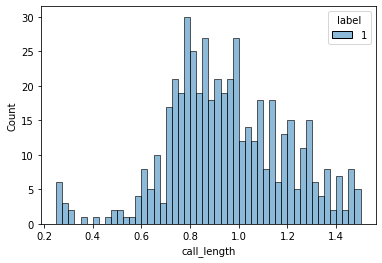

sum of all call lenghts for val_blend DS: 77.41925881099985
relative part of the overall length per label: 

       call_length
label             
1              1.0



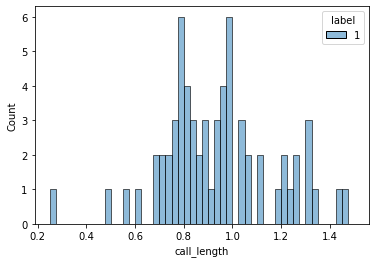

sum of all call lenghts for test_blend DS: 65.31938807600017
relative part of the overall length per label: 

       call_length
label             
1              1.0



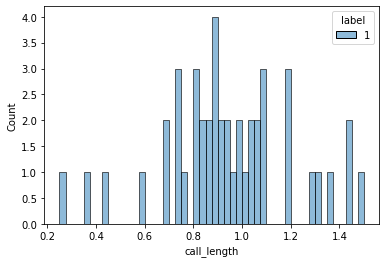

In [31]:
print(f'overall number of samples: {model_annot_all_df.size}')
train_annot_df_blend = model_annot_all_df.copy().iloc[lambda x: x.index % 5 != 0]
val_annot_df_blend = model_annot_all_df.copy().iloc[lambda x: x.index % 10 == 0]
test_annot_df_blend = pd.concat([model_annot_all_df.copy(),train_annot_df_blend, val_annot_df_blend]).drop_duplicates(keep=False)

print(f'train_annot_df: {train_annot_df_blend.size}, val_annot_df:{val_annot_df_blend.size}, test_annot_df_blend:{test_annot_df_blend.size}')
print(f'sanity: train+val+test: {train_annot_df_blend.size + val_annot_df_blend.size + test_annot_df_blend.size}')

relative_length_per_label(train_annot_df_blend, 'train_blend')
relative_length_per_label(val_annot_df_blend, 'val_blend')
relative_length_per_label(test_annot_df_blend, 'test_blend')

## Split per file

In [32]:
print('REMINDER:')
print(f'audio_files_only_wo_cls:{audio_files_only_wo_cls}')
print(f'audio_files_only_cls:{audio_files_only_cls}')
print(f'audio_files_all_calls_combined:{audio_files_all_calls_combined}')
print(f'dataset was created for task: {task}, with the following list of files: {datasets_list_of_files}')

REMINDER:
audio_files_only_wo_cls:['210922-112437' '210926-104317' '210925-104759' '210919-140341']
audio_files_only_cls:['210919-131709' '210920-103949']
audio_files_all_calls_combined:['210922-112437' '210926-104317' '210925-104759' '210919-140341'
 '210919-131709' '210920-103949']
dataset was created for task: det, with the following list of files: ['210922-112437', '210926-104317', '210925-104759', '210919-140341', '210919-131709', '210920-103949']


In [33]:
if task == "cls":
    # train_files = ['210919-131709']
    val_files = ['']
    test_files = ['210920-103949']
elif task == "det":
    val_files = ['210925-104759']
    test_files = ['210919-140341', '210920-103949']

assert len(set(val_files).intersection(set(test_files))) == 0

In [34]:
model_annot_train_df = model_annot_all_df[~model_annot_all_df.filename.isin(val_files + test_files)]
model_annot_val_df = model_annot_all_df[model_annot_all_df.filename.isin(val_files)]
model_annot_test_df = model_annot_all_df[model_annot_all_df.filename.isin(test_files)]
assert model_annot_train_df.size > 0
assert model_annot_test_df.size > 0

### Explore the splitted DS

In [35]:
print(f'train_annot_df: {model_annot_train_df.size}, val_annot_df:{model_annot_val_df.size}, test_annot_df_blend:{model_annot_test_df.size}')
print(f'sanity: train+val+test: {model_annot_train_df.size + model_annot_val_df.size + model_annot_test_df.size}')

train_annot_df: 3468, val_annot_df:1104, test_annot_df_blend:72
sanity: train+val+test: 4644


sum of all call lenghts for train DS: 594.960619226001
relative part of the overall length per label: 

       call_length
label             
1              1.0



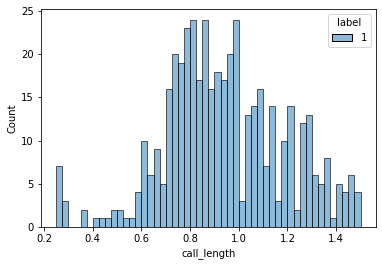

sum of all call lenghts for val DS: 184.02627957199974
relative part of the overall length per label: 

       call_length
label             
1              1.0



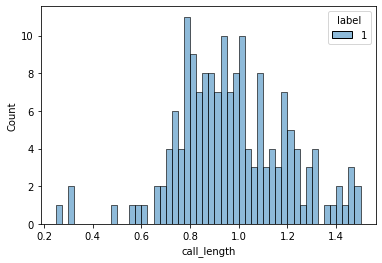

sum of all call lenghts for test DS: 10.78225980199997
relative part of the overall length per label: 

       call_length
label             
1              1.0



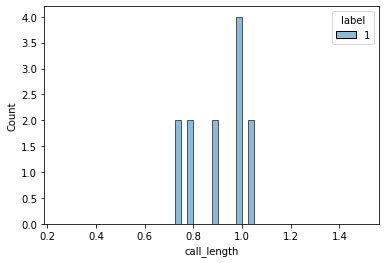

In [36]:
relative_length_per_label(model_annot_train_df, 'train')
relative_length_per_label(model_annot_val_df, 'val')
relative_length_per_label(model_annot_test_df, 'test')

## Save the data

In [38]:
basepath = '/home/shai/personal/soundbay/data/annotated_calls/'
save_data = False
split_blend = False
split_per_files = False
if save_data:
    if split_blend:
        train_annot_df_blend.to_csv(basepath + task+ '_df_train_blend.csv', index=False)
        val_annot_df_blend.to_csv(basepath + task+ '_df_val_blend.csv', index=False)
        test_annot_df_blend.to_csv(basepath + task+ '_df_test_blend.csv', index=False)
    if split_per_files:
        model_annot_train_df.to_csv(basepath + task + '_df_annot_train_per_file.csv', index=False)
        model_annot_val_df.to_csv(basepath + task + '_df_annot_val_per_file.csv', index=False)
        model_annot_test_df.to_csv(basepath + task + '_df_annot_test_per_file.csv', index=False)
        
print('DONE')

DONE
